In [1]:
import rospy
import tf
from sensor_msgs.msg import Joy, Imu
from nav_msgs.msg import Odometry
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
from subprocess import Popen
import sys
import os
import pickle
from os.path import expanduser
home = expanduser("~")
sys.path.insert(0, home + "Documents/pyniel") # Pyniel as available on github
%matplotlib notebook
plt.ion()

In [2]:
#!/usr/bin/env python

   
class Listener(object):
    def __init__(self, max_frames=100):
        self.imu_topic = "/pepper_robot/imu/base"
        self.joystick_topic = "/joy"
        self.odom_topic = "/pepper_robot/odom"
        self.joysticks = []
        self.imus = []
        self.odoms = []
        self.MAX_FRAMES = max_frames
        
        rospy.init_node('listener', anonymous=False)
        self.imu_sub = rospy.Subscriber(self.imu_topic, Imu, self._imu_callback)
        self.odom_sub = rospy.Subscriber(self.odom_topic, Odometry, self._odom_callback)
        self.joystick_sub = rospy.Subscriber(self.joystick_topic, Joy, self._joy_callback)
        
    def spin(self):
        # spin() simply keeps python from exiting until this node is stopped
        rospy.spin()
    
            
    def _joy_callback(self, data):
        rospy.loginfo("Frame: %s " +  rospy.get_caller_id() + "I heard %s", len(self.joysticks), data.axes)
        clear_output(wait=True)
        self.joysticks.append(data)
        if len(self.joysticks) > self.MAX_FRAMES:
          rospy.signal_shutdown("Message received")
    
    def _imu_callback(self, data):
        self.imus.append(data)

    def _odom_callback(self, data):
        self.odoms.append(data)
            
if __name__ == '__main__':
    l = Listener()
    try:
      l.spin()
    except KeyboardInterrupt:
        print("Ended")
    #frames = l.frames
    

[INFO] [1530890754.634695]: Frame: 100 /listenerI heard (-0.0, 1.0, 0.0, 0.0, 0.0, 0.0)


daniel@prometheus:~ $ ping 172.30.50.11  
PING 172.30.50.11 (172.30.50.11) 56(84) bytes of data.  
64 bytes from 172.30.50.11: icmp_seq=1 ttl=64 time=0.286 ms  
64 bytes from 172.30.50.11: icmp_seq=2 ttl=64 time=0.296 ms  
64 bytes from 172.30.50.11: icmp_seq=3 ttl=64 time=0.277 ms  
64 bytes from 172.30.50.11: icmp_seq=4 ttl=64 time=0.320 ms  
64 bytes from 172.30.50.11: icmp_seq=5 ttl=64 time=0.265 ms  
64 bytes from 172.30.50.11: icmp_seq=6 ttl=64 time=0.278 ms  
64 bytes from 172.30.50.11: icmp_seq=7 ttl=64 time=0.325 ms  
64 bytes from 172.30.50.11: icmp_seq=8 ttl=64 time=0.281 ms  
64 bytes from 172.30.50.11: icmp_seq=9 ttl=64 time=0.287 ms  
64 bytes from 172.30.50.11: icmp_seq=10 ttl=64 time=0.336 ms  
64 bytes from 172.30.50.11: icmp_seq=11 ttl=64 time=0.279 ms  
64 bytes from 172.30.50.11: icmp_seq=12 ttl=64 time=0.295 ms  
64 bytes from 172.30.50.11: icmp_seq=13 ttl=64 time=0.310 ms  

In [3]:
t0 = l.imus[0].header.stamp.secs
t = [m.header.stamp.secs - t0 + m.header.stamp.nsecs * 1e-9 for m in l.joysticks]
x = [m.axes[0] for m in l.joysticks]
y = [m.axes[1] for m in l.joysticks]
at = [m.header.stamp.secs - t0 + m.header.stamp.nsecs * 1e-9 for m in l.imus]
ax = [m.linear_acceleration.x for m in l.imus]
ay = [m.linear_acceleration.y for m in l.imus]
az = [m.linear_acceleration.z for m in l.imus]
ot = [m.header.stamp.secs - t0 + m.header.stamp.nsecs * 1e-9 for m in l.odoms]
ox = [m.twist.twist.linear.x for m in l.odoms]
oy = [m.twist.twist.linear.y for m in l.odoms]

In [4]:
t = np.array(t) * 1000
at = np.array(at) * 1000
ot = np.array(ot) * 1000

In [5]:
ox

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.010624675080180168,
 0.022499311715364456,
 0.020624369382858276,
 0.07999756187200546,
 0.08687233924865723,
 0.09437210857868195,
 0.1293710321187973,
 0.1606200635433197,
 0.16561993956565857,
 0.19061914086341858,
 0.22936800122261047,
 0.23249289393424988,
 0.2524922490119934,
 0.2824913561344147,
 0.28561627864837646,
 0.31374040246009827,
 0.34061458706855774,
 0.34373947978019714,
 0.3393646478652954,
 0.35311418771743774,
 0.3568640947341919,
 0.351864218711853,
 0.34811434149742126,
 0.34998929500579834,
 0.3493642807006836,
 0.3456144630908966,
 0.339364618062973,
 0.3549891710281372,
 0.3424895405769348,
 0.3406146168708801,
 0.3412395715713501,
 0.3424895405769348,
 0.33748966455459595,
 0.3424895405769348,
 0.34061458706855774,
 0.3337398171424866,
 0.31124046444892883,
 0.283741295337677,
 0.2806164026260376,
 0.2543672025203705,
 0.21249349415302277,
 0.20624369382858276,
 0.17749455571174622,
 0.14999541640281677,
 0.1

<IPython.core.display.Javascript object>


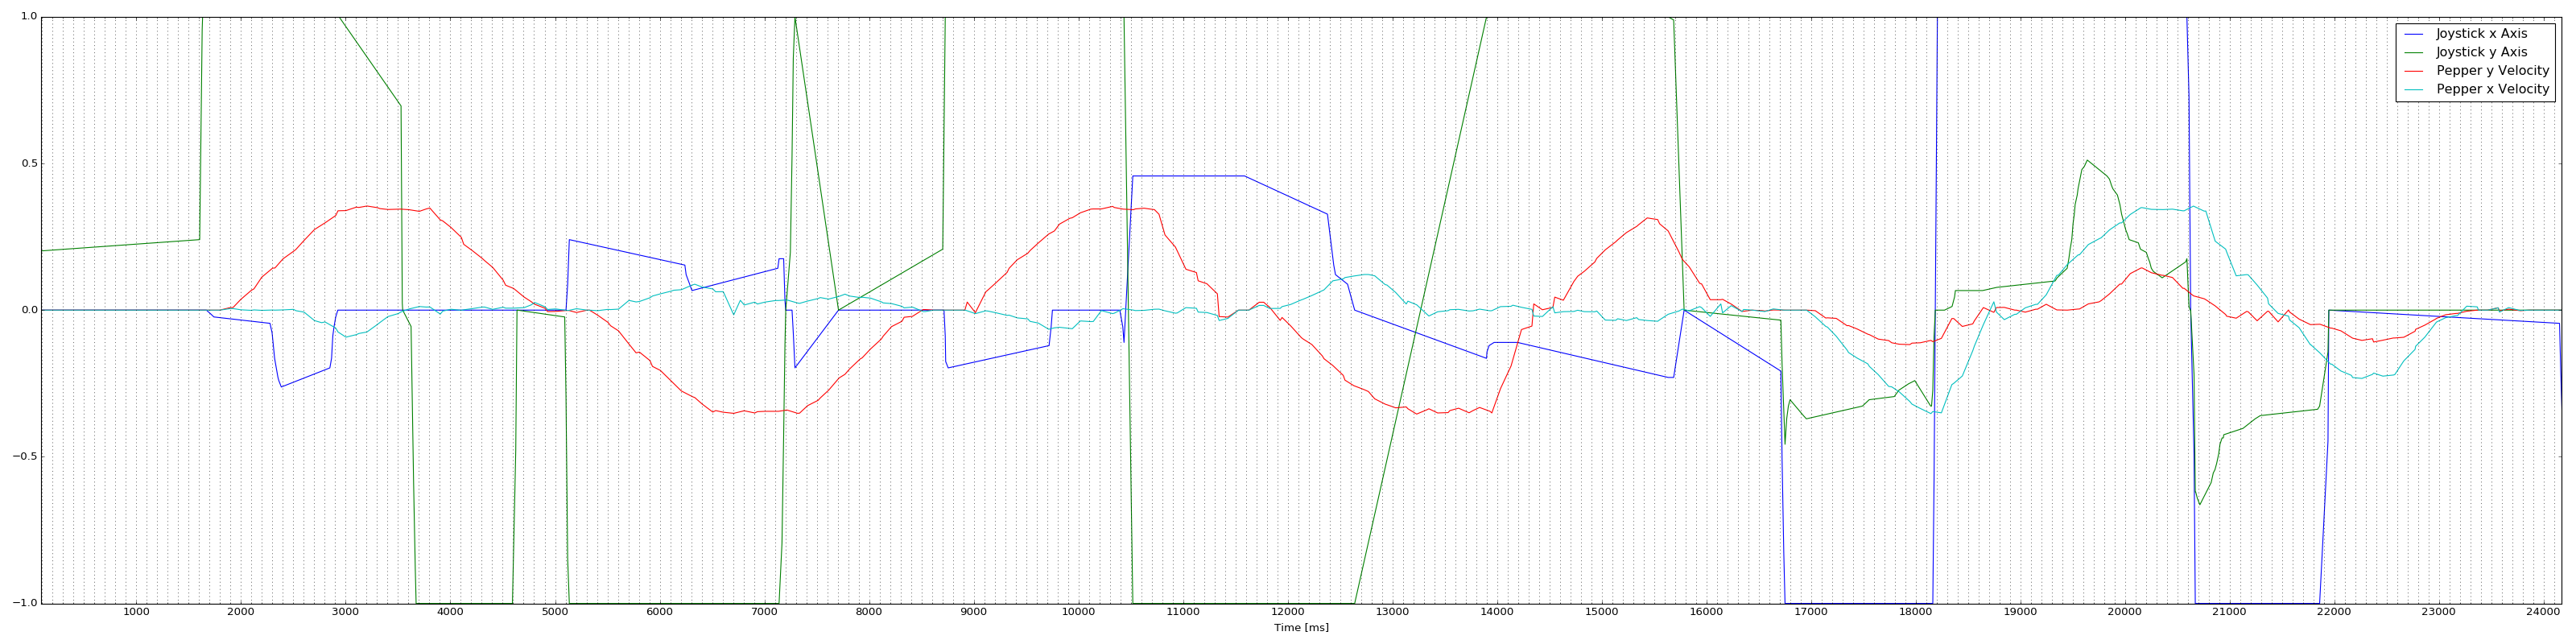

In [3]:
%matplotlib notebook

plt.figure(figsize=(40,10))
plt.plot(t, x)
plt.plot(t, y)
plt.plot(ot, ox)
plt.plot(ot, oy)
plt.gca().set_xticks(np.arange(0, ot.max(), step=100), minor=True)
plt.xticks(np.arange(0, ot.max(), step=1000))
plt.xlim([ot.min(), ot.max()])
plt.grid(which='minor')
plt.legend(['Joystick x Axis','Joystick y Axis','Pepper y Velocity','Pepper x Velocity'])
plt.xlabel('Time [ms]')
plt.tight_layout()
plt.savefig('/tmp/PepperPerformance.pdf')

<IPython.core.display.Javascript object>


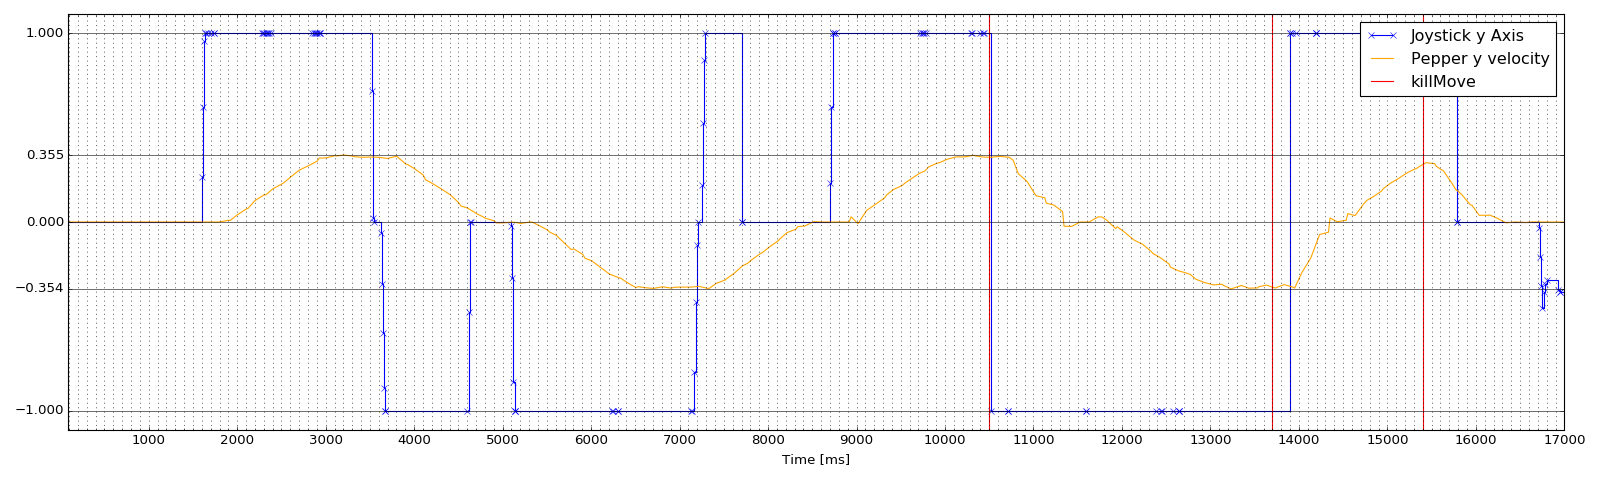

In [17]:
%matplotlib notebook

plt.figure(figsize=(20,6))
#plt.plot(t, x)
plt.step(t, y, marker='x', where='post')
plt.plot(ot, ox, color='orange')
plt.axvline(x=10500, color='r')
plt.axvline(x=13700, color='r')
plt.axvline(x=15400, color='r')
#plt.plot(ot, oy)
plt.gca().set_xticks(np.arange(0, ot.max(), step=100), minor=True)
plt.xticks(np.arange(0, ot.max(), step=1000))
plt.xlim([ot.min(), 17000])
plt.ylim([-1.1, 1.1])
plt.grid(which='minor')
plt.yticks([-1,np.min(ox),0,np.max(ox),1])
plt.grid(linestyle='-', which='major', axis='y')
plt.legend(['Joystick y Axis','Pepper y velocity','killMove'])
plt.xlabel('Time [ms]')
plt.tight_layout()
plt.savefig('/tmp/kill_move_forwardback_pepper_performance.pdf')

<IPython.core.display.Javascript object>


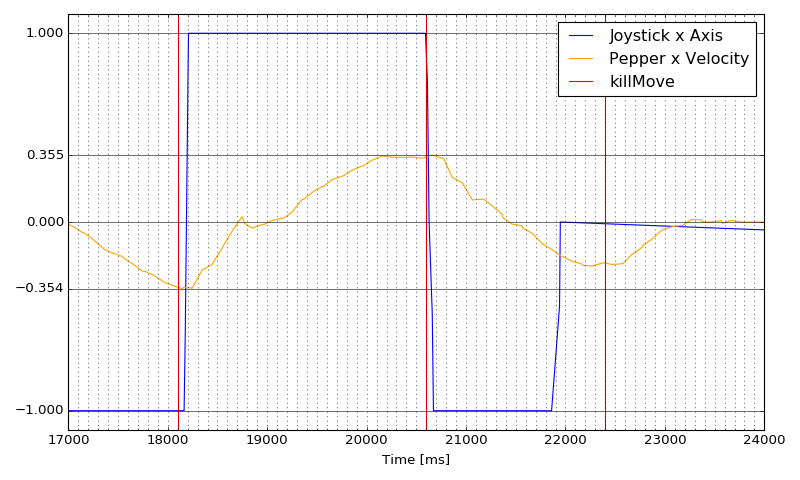

In [38]:
%matplotlib notebook

plt.figure(figsize=(10,6))
plt.plot(t, x)
plt.plot(ot, oy, color='orange')
#plt.plot(t, y)
#plt.plot(ot, ox)
plt.axvline(x=18100, color='r')
plt.axvline(x=20600, color='r')
plt.axvline(x=22400, color='r')

plt.gca().set_xticks(np.arange(0, ot.max(), step=100), minor=True)
plt.xticks(np.arange(0, ot.max(), step=1000))
plt.xlim([17000, 24000])
plt.ylim([-1.1, 1.1])
plt.grid(which='minor')
plt.yticks([-1,np.min(ox),0,np.max(ox),1])
plt.grid(linestyle='-', which='major', axis='y')
plt.legend(['Joystick x Axis','Pepper x Velocity','killMove'])
plt.xlabel('Time [ms]')
plt.tight_layout()
plt.savefig('/tmp/kill_move_side_pepper_performance.pdf')

In [8]:
archive = { 't': t, 'x': x, 'y': y, 'ot': ot, 'ox': ox, 'oy': oy, 'at': at, 'ax': ax, 'ay': ay, 'az': az }

In [9]:
with open("/home/daniel/pepper_data/MovePerformance.pickle", "wb") as f:
    pickle.dump(archive, f)

In [2]:
with open("/home/daniel/pepper_data/KillMovePerformance.pickle", "rb") as f:
    archive = pickle.load(f)
    locals().update(archive)